<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

  Using cached funpymodeling-0.1.9-py3-none-any.whl.metadata (1.3 kB)
  Using cached flake8-6.1.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\Users\alfre\AppData\Local\Programs\Python\Python313\python.exe C:\Users\alfre\AppData\Local\Temp\pip-install-ggqdhjyi\numpy_08ac7d306d1c43dc80abd51000c45ca6\vendored-meson\meson\meson.py setup C:\Users\alfre\AppData\Local\Temp\pip-install-ggqdhjyi\numpy_08ac7d306d1c43dc80abd51000c45ca6 C:\Users\alfre\AppData\Local\Temp\pip-install-ggqdhjyi\numpy_08ac7d306d1c43dc80abd51000c45ca6\.mesonpy-b1ae0qih -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\alfre\AppData\Local\Temp\pip-install-ggqdhjyi\numpy_08ac7d306d1c43dc80abd51000c45ca6\.mesonpy-b1ae0qih\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\alfre\AppData\Local\Temp\pip-install-ggqdhjyi\numpy_08ac7d306d1c43dc80abd51000c45ca6
      Build dir: C:\Users\alfre\AppData\Local\Temp\pip-install-ggq

In [ ]:
#instalar "C++ build tools" y "Windows 10 SDK".
#https://visualstudio.microsoft.com/es/visual-cpp-build-tools/

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
    #Cargar archivo csv desde equipo
    from google.colab import files
    files.upload()

In [2]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [3]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [4]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [5]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [3]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789
5,Teléfono,1,0.005848,0.926316
6,"Cuaderno,Redes sociales",1,0.005848,0.936842
7,"Aplicación móvil,De frente",1,0.005848,0.947368
8,Físico,1,0.005848,0.957895
9,"Aplicación móvil,Ninguna",1,0.005848,0.968421


In [4]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)
table2

,214_customer_relationship_tools,frequency
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6
5,Teléfono,1
6,"Cuaderno,Redes sociales",1
7,"Aplicación móvil,De frente",1
8,Físico,1
9,"Aplicación móvil,Ninguna",1


In [5]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]
Filtro

,214_customer_relationship_tools,frequency
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6


In [6]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('214_customer_relationship_tools')
Filtro_index

,frequency
214_customer_relationship_tools,
Redes sociales,27
Aplicación móvil,21
Ninguna,20
"Aplicación móvil,Redes sociales",13
Cuaderno,6


Text(0, 0.5, 'Frecuencia')

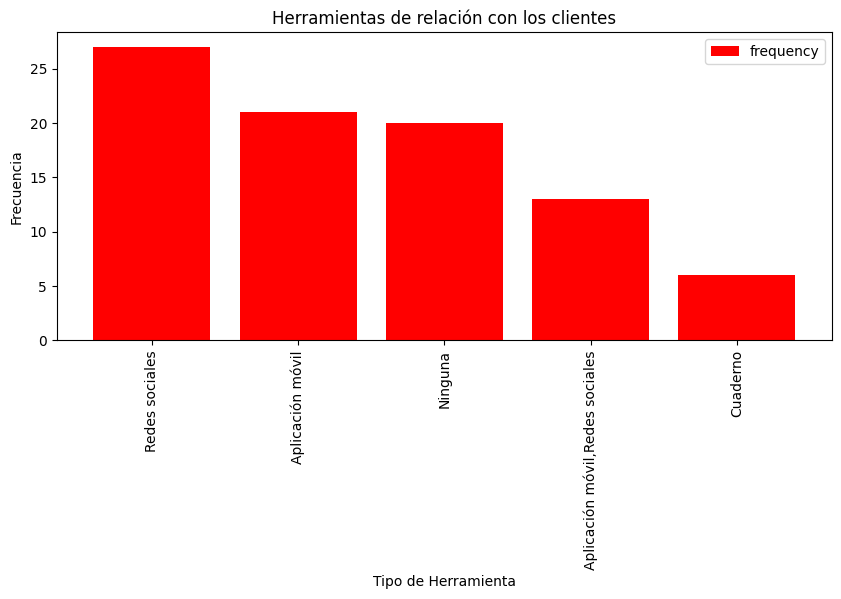

In [10]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

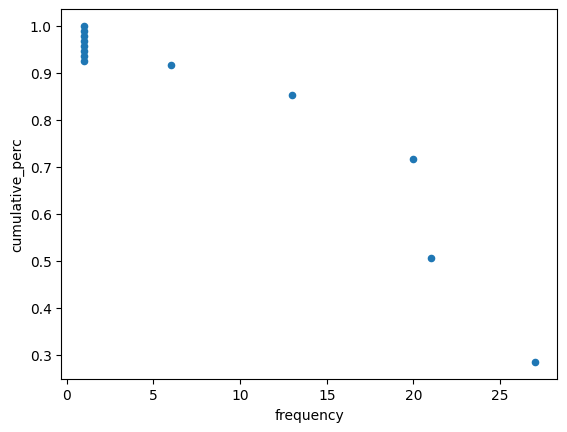

In [27]:
#Realizamos grafico de dispersión del dataframe filtrado
table1.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='214_customer_relationship_tools'>

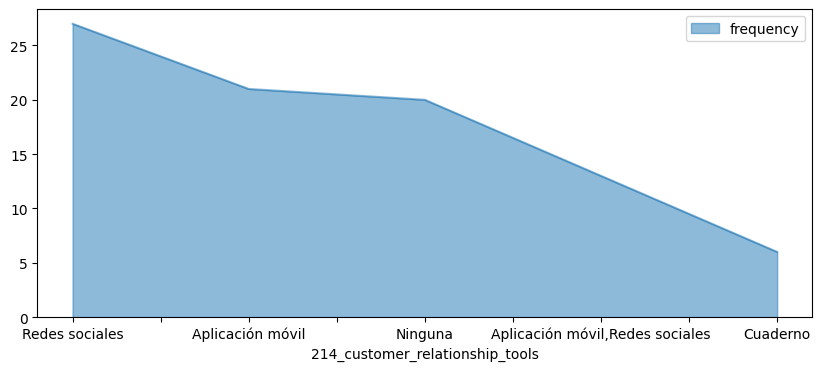

In [28]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

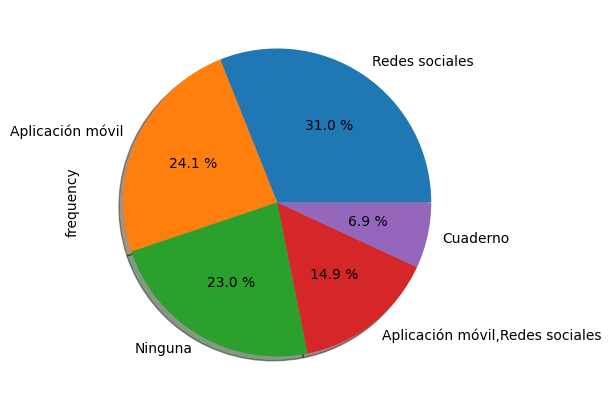

In [29]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

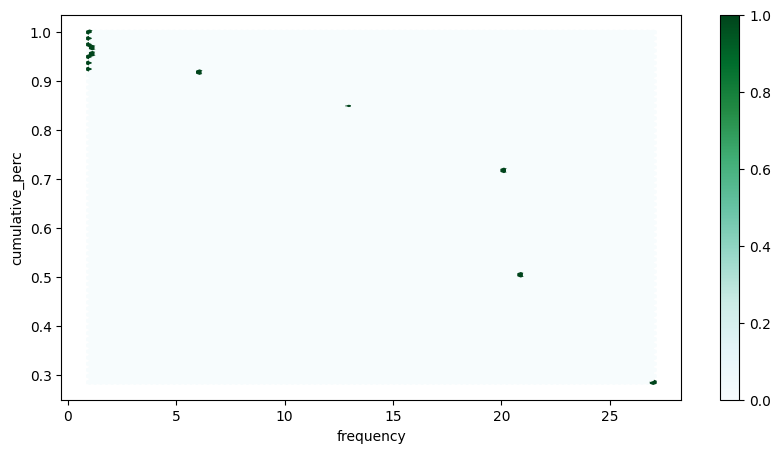

In [31]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

**Determinación de Clases para datos agrupados**


In [11]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [12]:
#Corroboramos valores nulos
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

_record_id                                                      0
_title                                                          0
_server_updated_at                                              0
_updated_by                                                     0
_geometry                                                       0
_latitude                                                       0
_longitude                                                      0
228_store_name                                                  0
229_store_picture                                               0
232_type_of_store                                               0
108_does_the_micro_retailer_has_a_barred_window_                0
99_does_the_micro_retailer_exhibits_products_outside_           0
102_does_the_micro_retailer_sells_fresh_products_               0
97_number_of_customers_in_store                                 0
268_number_fridges                                              3
184_store_

In [22]:
#Calculamos el numero total de la población "n"
Micro_Retailer['_latitude']. info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 171 entries, 0 to 170
Series name: _latitude
Non-Null Count  Dtype  
--------------  -----  
171 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB


In [25]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Micro_Retailer['_latitude'].max()
Min=Micro_Retailer['_latitude'].min()
Limites= [Min, Max]
Limites

[18.9993095, 19.0752733]

In [26]:
#Calculamos el rango R
R=Max-Min
R

0.07596380000000025

In [32]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

8.41354708650195

In [33]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.009028748424296662

**Creación de Categorias a partir de clases**

In [43]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(18.9993095, 19.0752733, 9)
intervalos

array([18.9993095 , 19.00880498, 19.01830045, 19.02779592, 19.0372914 ,
       19.04678687, 19.05628235, 19.06577782, 19.0752733 ])

In [44]:
#Creamos las categorías 
categorias= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8"]

In [45]:
#Finalmente creamos las categorías en la columna numérica
Micro_Retailer['_latitude']=pd.cut(x= Micro_Retailer['_latitude'], bins=intervalos, labels= categorias )
Micro_Retailer['_latitude']

0      Categoría6
1      Categoría6
2      Categoría7
3      Categoría7
4      Categoría7
5      Categoría7
6      Categoría7
7      Categoría7
8      Categoría7
9      Categoría7
10     Categoría3
11     Categoría3
12     Categoría3
13     Categoría3
14     Categoría3
15     Categoría3
16     Categoría3
17     Categoría3
18     Categoría3
19     Categoría3
20     Categoría5
21     Categoría7
22     Categoría7
23     Categoría7
24     Categoría7
25     Categoría7
26     Categoría7
27     Categoría7
28     Categoría7
29     Categoría7
30     Categoría7
31     Categoría7
32     Categoría7
33     Categoría8
34     Categoría4
35     Categoría2
36     Categoría2
37     Categoría2
38     Categoría2
39     Categoría2
40     Categoría3
41     Categoría3
42     Categoría2
43     Categoría3
44     Categoría5
45     Categoría5
46     Categoría3
47     Categoría2
48     Categoría2
49     Categoría2
50     Categoría2
51     Categoría4
52     Categoría5
53     Categoría5
54     Categoría5
55     Cat